In [2]:
# Set up and load modules nothing special here
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext autotime

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.dpi'] = 100

#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.26s). [brian2.stateupdaters.base.method_choice]


#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######


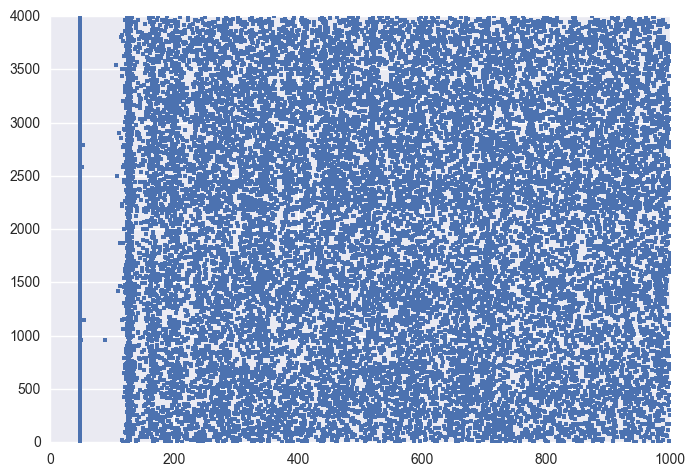

time: 8.29 s


In [3]:
from brian2 import *
eqs = '''
dv/dt = (ge+gi-(v+49*mV))/(20*ms) : volt
dge/dt = -ge/(5*ms) : volt
dgi/dt = -gi/(10*ms) : volt
'''
P = NeuronGroup(4000, eqs, threshold='v>-50*mV', reset='v=-60*mV')
P.v = -60*mV
Pe = P[:3200]
Pi = P[3200:]
Ce = Synapses(Pe, P, on_pre='ge+=1.62*mV')
Ce.connect(p=0.02)
Ci = Synapses(Pi, P, on_pre='gi-=9*mV')
Ci.connect(p=0.02)
M = SpikeMonitor(P)
run(1*second)
plot(M.t/ms, M.i, '.')
show()